In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import scipy.constants as const
from beam.beams import electronbeam
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
from beam import interactions
from lens import profile
from scipy.interpolate import interp1d

path = '/media/robert/Data_Storage/Data/Super-Adiabatic_Ramp_Propagation/Mikes_fz/'

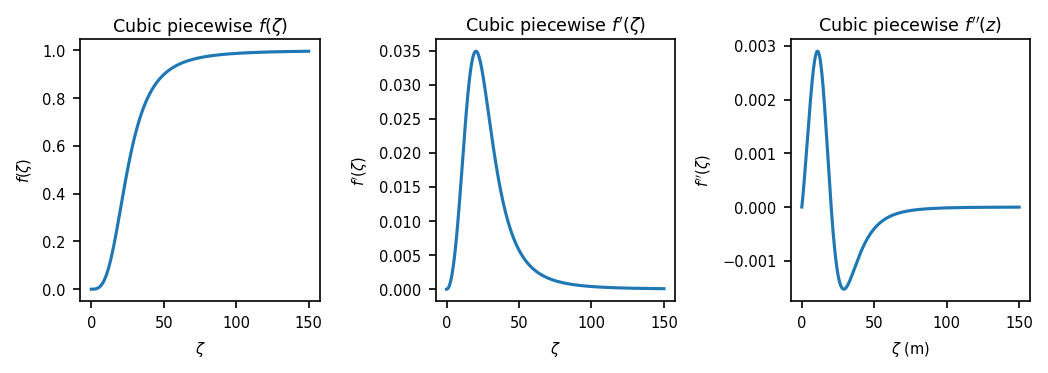

In [2]:
f = lambda z: 1 - 1/(1+(z/L)**(3+P))
fp = lambda z: (3+P)*(z/L)**(2+P)/(1+(z/L)**(3+P))**2/L
fpp = lambda z: -2*(3+P)**2*(z/L)**(4+2*P)/(1+(z/L)**(3+P))**3/L**2 \
                + (3+P)*(2+P)*(z/L)**(1+P)/(1+(z/L)**(3+P))**2/L**2

Nz = 10000
Z = 150
L = 25
P = 0.15
z, dz = np.linspace(0, Z, Nz, retstep=True)
plt.figure(figsize=(7, 2.5), dpi=150)
gs = gridspec.GridSpec(1, 3)
plt.subplot(gs[0, 0])
plt.plot(z, f(z))
plt.title(r"Cubic piecewise $f(\zeta)$")
plt.xlabel(r'$\zeta$')
plt.ylabel(r"$f(\zeta)$")

plt.subplot(gs[0, 1])
plt.plot(z, fp(z))
plt.title(r"Cubic piecewise $f'(\zeta)$")
plt.xlabel(r'$\zeta$')
plt.ylabel(r"$f'(\zeta)$")

plt.subplot(gs[0, 2])
plt.plot(z, fpp(z))
plt.title(r"Cubic piecewise $f''(z)$")
plt.xlabel(r'$\zeta$ (m)')
plt.ylabel(r"$f''(\zeta)$")

plt.tight_layout()
plt.show()

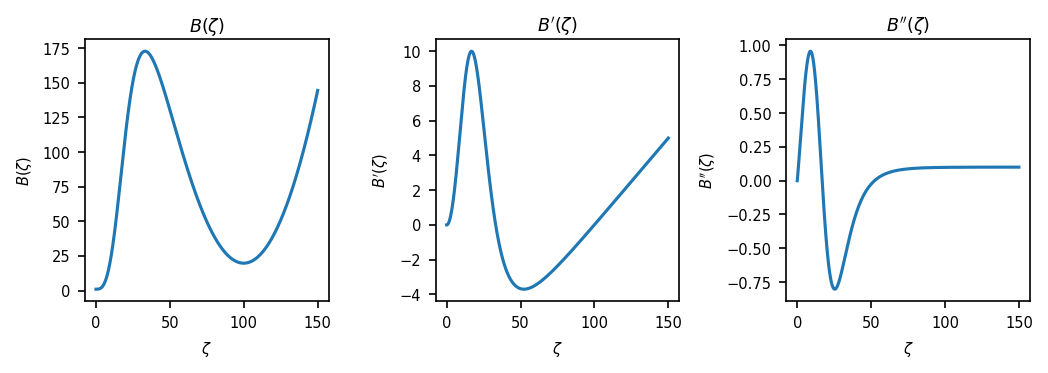

In [3]:
# Now let's look at the beta function that result from this f(z)
g = lambda z: (z-z0)**2/bs + bs - 1
gp = lambda z: 2*(z-z0)/bs
gpp = lambda z: 2/bs

b = lambda z: 1 + g(z)*f(z)
bp = lambda z: g(z)*fp(z) + gp(z)*f(z)
bpp = lambda z: g(z)*fpp(z)+2*gp(z)*fp(z)+gpp(z)*f(z)

bs = 20
z0 = 100
plt.figure(figsize=(7, 2.5), dpi=150)
gs = gridspec.GridSpec(1, 3)
plt.subplot(gs[0, 0])
plt.plot(z, b(z))
plt.title(r"$B(\zeta)$")
plt.xlabel(r'$\zeta$')
plt.ylabel(r"$B(\zeta)$")

plt.subplot(gs[0, 1])
plt.plot(z, bp(z))
plt.title(r"$B'(\zeta)$")
plt.xlabel(r'$\zeta$')
plt.ylabel(r"$B'(\zeta)$")

plt.subplot(gs[0, 2])
plt.plot(z, bpp(z))
plt.title(r"$B''(\zeta)$")
plt.xlabel(r'$\zeta$')
plt.ylabel(r"$B''(\zeta)$")

plt.tight_layout()
plt.show()

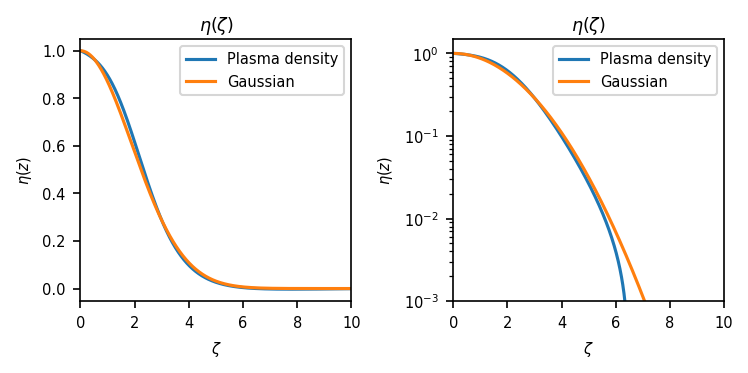

In [4]:
# Finally, let's look at the plasma ramp that result from this f(z)
ne = lambda z: 1/(b(z)**2)*(1+bp(z)**2/4)-bpp(z)/(2*b(z))
sigma = 1.9
plt.figure(figsize=(5, 2.5), dpi=150)
gs = gridspec.GridSpec(1, 2)
plt.subplot(gs[0, 0])
plt.plot(z, ne(z))
plt.plot(z, np.exp(-z**2/(2*sigma**2)))
plt.title(r"$\eta(\zeta)$")
plt.xlabel(r'$\zeta$')
plt.ylabel(r"$\eta(z)$")
plt.legend(['Plasma density', 'Gaussian'])
plt.xlim(0, 10)

plt.subplot(gs[0, 1])
plt.plot(z, ne(z))
plt.plot(z, np.exp(-z**2/(2*sigma**2)))
plt.title(r"$\eta(\zeta)$")
plt.xlabel(r'$\zeta$')
plt.ylabel(r"$\eta(z)$")
plt.legend(['Plasma density', 'Gaussian'])
plt.xlim(0, 10)
plt.ylim(1e-3, 1.5)
plt.yscale('log')

plt.tight_layout()
plt.show()

12.5 Negative plasma density: False
27.0 Negative plasma density: False
41.5 Negative plasma density: False
56.0 Negative plasma density: False
70.5 Negative plasma density: False
85.0 Negative plasma density: False


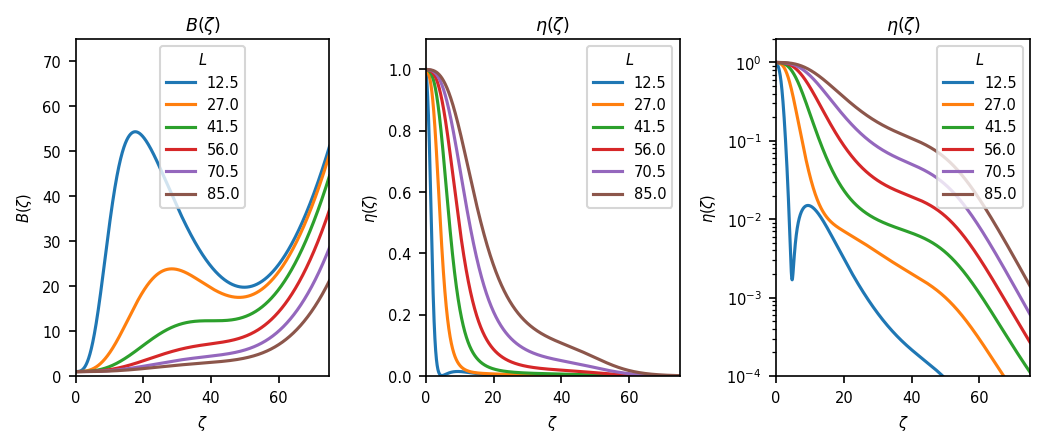

In [5]:
z0 = 50
P = 0.15
LArr = [0.375, 0.45, 0.525, 0.6, 0.675, 0.75, 0.825, 0.95]
LArr = np.linspace(12.5, 85, 6)
plt.figure(figsize=(7, 3), dpi=150)
gs = gridspec.GridSpec(1, 3)
plt.subplot(gs[0, 0])
for i in LArr:
    L = i
    plt.plot(z, b(z))
plt.title(r"$B(\zeta)$")
plt.xlabel(r'$\zeta$')
plt.ylabel(r"$B(\zeta)$")
plt.legend(LArr, title=r'$L$')
plt.xlim(0, 75)
plt.ylim(0, 75)

plt.subplot(gs[0, 1])
for i in LArr:
    L = i
    plt.plot(z, ne(z))
    print(L, 'Negative plasma density:', any(ne(z)<-1e-18))
plt.title(r"$\eta(\zeta)$")
plt.xlabel(r'$\zeta$')
plt.ylabel(r"$\eta(\zeta)$")
plt.legend(LArr, title=r'$L$')
plt.xlim(0.0, 75)
plt.ylim(0.0, 1.1)

plt.subplot(gs[0, 2])
for i in LArr:
    L = i
    plt.plot(z, ne(z))
plt.title(r"$\eta(\zeta)$")
plt.xlabel(r'$\zeta$')
plt.ylabel(r"$\eta(\zeta)$")
plt.legend(LArr, title=r'$L$')
plt.yscale('log')
plt.xlim(0.0, 75)
plt.ylim(1e-4, 2)

plt.tight_layout()
plt.show()

0.0 Negative plasma density: False
1.0 Negative plasma density: False
2.0 Negative plasma density: False
3.0 Negative plasma density: False
4.0 Negative plasma density: False
5.0 Negative plasma density: False


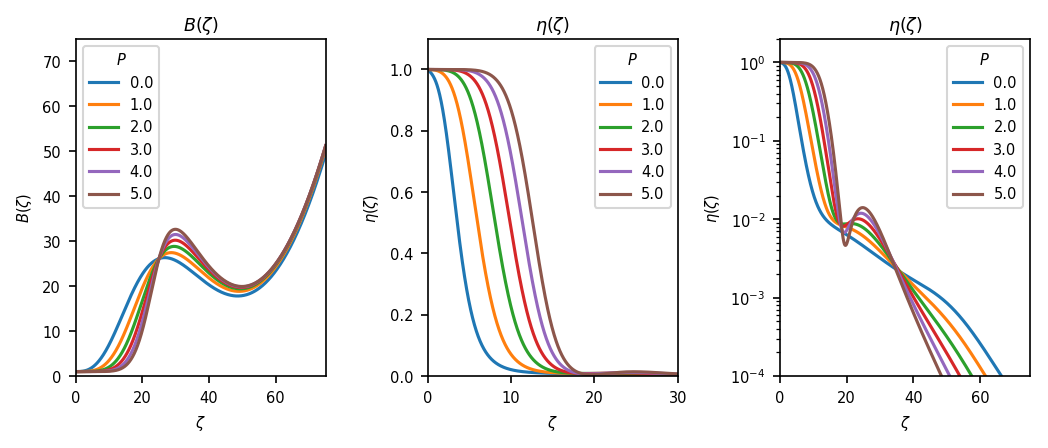

In [6]:
z0 = 50
L = 25
PArr = [0.375, 0.45, 0.525, 0.6, 0.675, 0.75, 0.825, 0.95]
PArr = np.linspace(0, 5, 6)
plt.figure(figsize=(7, 3), dpi=150)
gs = gridspec.GridSpec(1, 3)
plt.subplot(gs[0, 0])
for i in PArr:
    P = i
    plt.plot(z, b(z))
plt.title(r"$B(\zeta)$")
plt.xlabel(r'$\zeta$')
plt.ylabel(r"$B(\zeta)$")
plt.legend(PArr, title=r'$P$')
plt.xlim(0, 75)
plt.ylim(0, 75)

plt.subplot(gs[0, 1])
for i in PArr:
    P = i
    plt.plot(z, ne(z))
    print(P, 'Negative plasma density:', any(ne(z)<-1e-18))
plt.title(r"$\eta(\zeta)$")
plt.xlabel(r'$\zeta$')
plt.ylabel(r"$\eta(\zeta)$")
plt.legend(PArr, title=r'$P$')
plt.xlim(0.0, 30)
plt.ylim(0.0, 1.1)

plt.subplot(gs[0, 2])
for i in PArr:
    P = i
    plt.plot(z, ne(z))
plt.title(r"$\eta(\zeta)$")
plt.xlabel(r'$\zeta$')
plt.ylabel(r"$\eta(\zeta)$")
plt.legend(PArr, title=r'$P$')
plt.yscale('log')
plt.xlim(0.0, 75)
plt.ylim(1e-4, 2)

plt.tight_layout()
plt.show()